In [75]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [76]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [77]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [78]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [79]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaled= StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h" , 
                                                                        "price_change_percentage_7d", 
                                                                        "price_change_percentage_14d", 
                                                                        "price_change_percentage_30d", 
                                                                        "price_change_percentage_60d",
                                                                        "price_change_percentage_200d", 
                                                                        "price_change_percentage_1y"]])


In [80]:
# Create a DataFrame with the scaled data
market_data_scaled_df = pd.DataFrame(market_data_scaled, columns=["price_change_percentage_24h",
                                                            "price_change_percentage_7d",
                                                            "price_change_percentage_14d", 
                                                            "price_change_percentage_30d", 
                                                            "price_change_percentage_60d", 
                                                            "price_change_percentage_200d", 
                                                            "price_change_percentage_1y"])

# Copy the crypto names from the original data
market_data_scaled_df["coin_id"] = df_market_data.index


# Set the coinid column as index
market_data_scaled_df = market_data_scaled_df.set_index("coin_id")

# Display sample data
market_data_scaled_df.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [81]:
# Create a list with the number of k-values from 1 to 11

k_values = list(range(1, 11))

In [82]:
# Create an empty list to store the inertia values

inertia= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k_values:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_scaled_df)
    inertia.append(k_model.inertia_)



c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [83]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k_values, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Create a DataFrame with the data to plot the Elbow curve

df_elbow.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [84]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_graph= df_elbow.hvplot.line(
            x="k", 
            y="inertia", 
            title="Elbow Curve", 
            xticks=k_values)

elbow_graph


:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [85]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=4, random_state=1)

In [86]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaled_df)

c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [87]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4 = model.predict(market_data_scaled_df)

# Print the resulting array of cluster values.

k_4

array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [88]:
# Create a copy of the DataFrame
market_data_scaled_df_copy= market_data_scaled_df.copy()

In [89]:
# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_df_copy['clusters']= k_4

# Display sample data
market_data_scaled_df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [90]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_market_data = market_data_scaled_df_copy.hvplot.scatter(
        x="price_change_percentage_24h",
        y="price_change_percentage_7d",
        by="clusters",
        hover_cols= "coin_id"

)

scatter_plot_market_data

:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [91]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [92]:
# Use the PCA model with `fit_transform` to reduce to three principal components.
pca_fit = pca.fit_transform(market_data_scaled_df)

# View the first five rows of the DataFrame(array). 
pca_fit[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [93]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.

pca.explained_variance_ratio_


array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [94]:
# Create a new DataFrame with the PCA data.
pca_df= pd.DataFrame(pca_fit, columns= ["PC1", "PC2", "PC3" ])


# Copy the crypto names from the original data
pca_df["coin_id"] = market_data_scaled_df.index.copy()

# Set the coinid column as index
pca_df.set_index("coin_id", inplace=True)

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [95]:
# Create a list with the number of k-values from 1 to 11
k_values2 = list(range(1,11))


In [96]:
# Create an empty list to store the inertia values
inertia2= []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k_values2:
    k_model2 = KMeans(n_clusters=i, random_state=1)
    k_model2.fit(market_data_scaled_df)
    inertia2.append(k_model.inertia_)



c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [97]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_data2 = {"k": k_values, "inertia": inertia}
df_elbow2 = pd.DataFrame(elbow_data2)

# Create a DataFrame with the data to plot the Elbow curve

df_elbow2.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923


In [98]:
# Plot a line chart with all the inertia values computed with the different values of k to visually identify the optimal value for k.
elbow_graph2= df_elbow2.hvplot.line(
            x="k", 
            y="inertia", 
            title="Elbow Curve", 
            xticks=k_values2)

elbow_graph2

:Curve   [k]   (inertia)

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:**  No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [99]:
# Initialize the K-Means model using the best value for k

model2 = KMeans(n_clusters=4, random_state=1)

In [100]:
# Fit the K-Means model using the PCA data
model2.fit(market_data_scaled_df)

c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\aacha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [101]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4_2 = model.predict(market_data_scaled_df)

# Print the resulting array of cluster values.

k_4_2



array([3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 0, 3, 1, 1, 2, 1, 1, 1, 1])

In [102]:
# Create a copy of the DataFrame with the PCA data

market_data_scaled_df_2_copy= market_data_scaled_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_scaled_df_2_copy['clusters']= k_4_2

# Display sample data
market_data_scaled_df_2_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [103]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

scatter_plot_market_data2 = market_data_scaled_df_2_copy.hvplot.scatter(
        x="price_change_percentage_24h",
        y="price_change_percentage_7d",
        by="clusters",
        hover_cols= "coin_id"

)

scatter_plot_market_data2



:NdOverlay   [clusters]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

Text(0, 0.5, 'inertia')

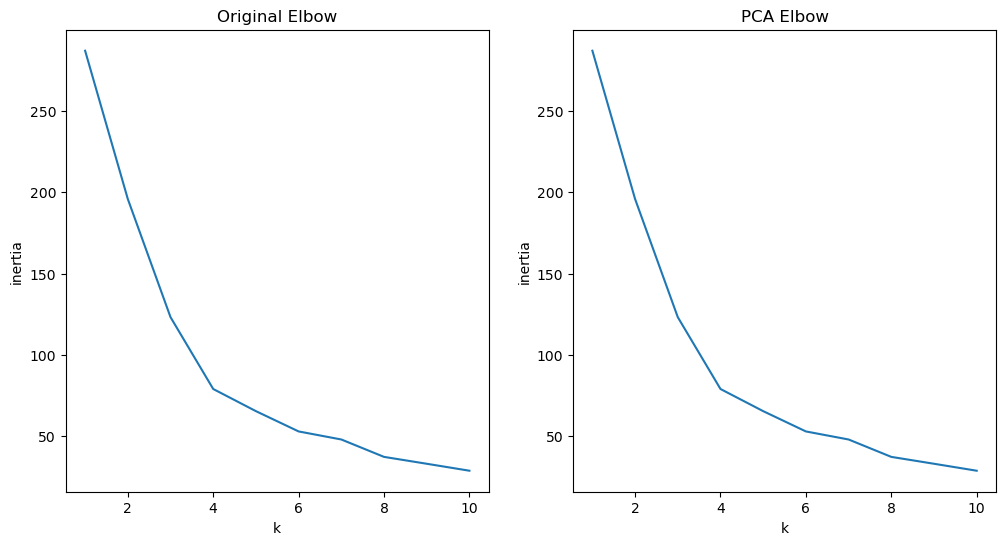

In [104]:
#Used Xpert AI and Office hours to complete code

# Composite plot to contrast the Elbow curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Elbow Curve on the first subplot
ax1.plot(df_elbow['k'], df_elbow['inertia'])
ax1.set_title('Original Elbow')
ax1.set_xlabel('k')
ax1.set_ylabel('inertia')

# Elbow Curve on the second subplot
ax2.plot(df_elbow2['k'], df_elbow2['inertia'])
ax2.set_title('PCA Elbow')
ax2.set_xlabel('k')
ax2.set_ylabel('inertia')

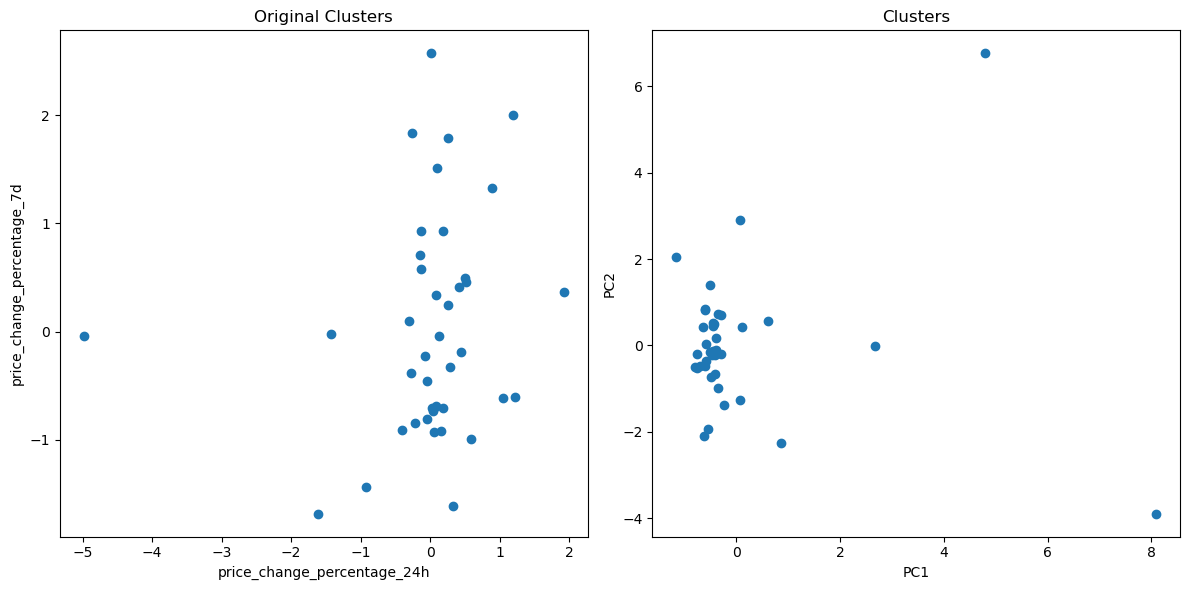

In [107]:
#Used Xpert AI and Office hours to complete code

# Composite plot to contrast the clusters 
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot on the first subplot
ax1.scatter(market_data_scaled_df['price_change_percentage_24h'], market_data_scaled_df['price_change_percentage_7d'])
ax1.set_title('Original Clusters')
ax1.set_xlabel('price_change_percentage_24h')
ax1.set_ylabel('price_change_percentage_7d')

# Scatter plot on the second subplot
ax2.scatter(pca_df['PC1'], pca_df['PC2'])
ax2.set_title('Clusters')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**
  using fewer features will show tighter groups in the data